In [3]:
from scipy import stats

In [4]:
pip install xlrd

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [150]:
df = pd.read_excel('data/book.xlsx')


In [151]:
df.head()

,степень роста,Дата анализа,Пол,Цистит/пиелонефрит,Дренажи,МКБ,Осложн/ не осложн,Микроорганизм,Азитромицин,Амикацин,...,Линезолид,Меропенем,Тигециклин,Фосфомицин,Фурагин,Цефепим,Цефокситин (скрининг),Цефоперазон-сульбактам,Цефотаксим,Цефтазидим
0,NaN,2024-10-09 00:00:00,2,1,0,1,0,1,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
1,NaN,2024-09-09 00:00:00,1,2,0,1,1,1,NaN,NaN,...,NaN,1.0,NaN,NaN,NaN,1.0,NaN,1.0,NaN,NaN
2,NaN,2024-04-05 00:00:00,1,0,0,1,0,2,NaN,NaN,...,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,2024-04-10 00:00:00,2,0,1,1,1,2,NaN,1.0,...,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,1.0
4,NaN,2024-05-02 00:00:00,2,0,1,1,0,2,NaN,NaN,...,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN


In [152]:
col_list = ['Пол', 'Цистит/пиелонефрит', 'Дренажи', 'МКБ', 'Осложн/ не осложн', 'Микроорганизм']
data = df[col_list]

In [153]:
data.head()

,Пол,Цистит/пиелонефрит,Дренажи,МКБ,Осложн/ не осложн,Микроорганизм
0,2,1,0,1,0,1
1,1,2,0,1,1,1
2,1,0,0,1,0,2
3,2,0,1,1,1,2
4,2,0,1,1,0,2


In [154]:
data.isna().sum()

Пол                   0
Цистит/пиелонефрит    0
Дренажи               0
МКБ                   0
Осложн/ не осложн     0
Микроорганизм         0
dtype: int64

In [155]:
data['Дренажи'].describe()

count    601.000000
mean       0.489185
std        0.707319
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max        2.000000
Name: Дренажи, dtype: float64

In [174]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 600 entries, 0 to 600
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype
---  ------              --------------  -----
 0   Пол                 600 non-null    int64
 1   Цистит/пиелонефрит  600 non-null    int64
 2   Дренажи             600 non-null    int64
 3   МКБ                 600 non-null    int64
 4   Осложн/ не осложн   600 non-null    int64
 5   Микроорганизм       600 non-null    int64
dtypes: int64(6)
memory usage: 32.8 KB


In [165]:
data['Микроорганизм'] = data['Микроорганизм'].astype(int)

In [157]:
data = data.drop(data[data['Микроорганизм'] == 'Morganella morganii '].index)


In [166]:
data['Микроорганизм'].value_counts()

Микроорганизм
8     365
6      80
9      66
10     27
1      26
13     15
4      11
7       6
15      3
3       1
Name: count, dtype: int64

In [168]:
seller_list = df['Микроорганизм'].value_counts().nlargest(49).index.to_list()

In [169]:
data['Микроорганизм'] = data['Микроорганизм'].apply(lambda x: 1 if x == 2 or x == 12 else x)

In [170]:
data['Микроорганизм'] = data['Микроорганизм'].apply(lambda x: 13 if x == 14 or x == 16 else x)

In [171]:
data['Микроорганизм'] = data['Микроорганизм'].apply(lambda x: 10 if x == 11 else x)

In [175]:
data['Микроорганизм'] = data['Микроорганизм'].apply(lambda x: 3 if x == 4 or x == 5 else x)

In [176]:
data['Микроорганизм'].value_counts()

Микроорганизм
8     365
6      80
9      66
10     27
1      26
13     15
3      12
7       6
15      3
Name: count, dtype: int64

In [173]:
micro_list = data['Микроорганизм'].value_counts().nlargest(7).index.to_list()

In [124]:
micro_list = data['Микроорганизм'].value_counts().nlargest(7).index
def micro_other(micro):
    if micro in micro_list:
        micro = micro
    else:
        micro = 15
    return micro      
data['Микроорганизм'] = data['Микроорганизм'].apply(micro_other)

In [148]:
data['Микроорганизм'].value_counts()

Микроорганизм
8     365
6      80
9      66
10     27
Name: count, dtype: int64

In [147]:
data = data.drop(data[data['Микроорганизм'] == 1].index)

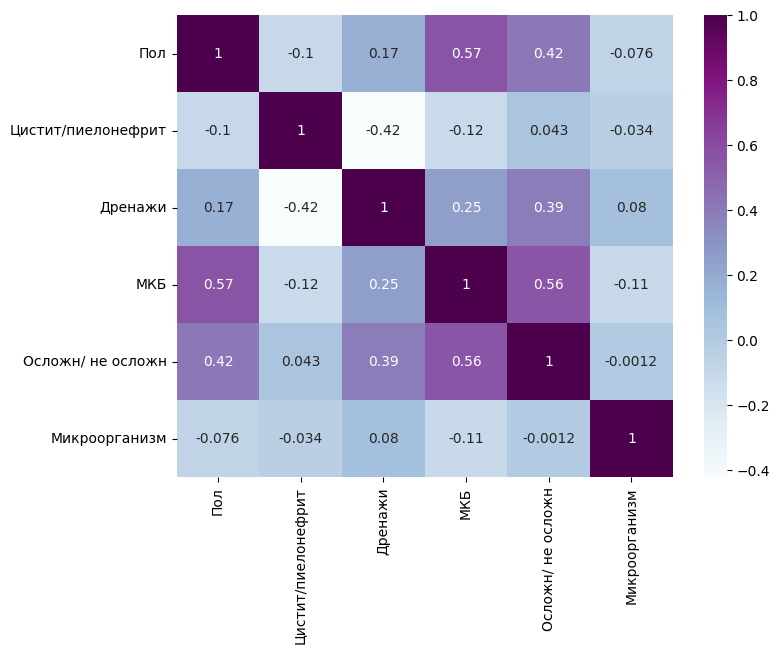

In [149]:
correlation=data.corr()

plt.figure(figsize=(8,6))
sns.heatmap(correlation, annot=True, cmap='BuPu')
plt.show()

In [141]:
y = data['Микроорганизм']

In [142]:
X = data.drop('Микроорганизм', axis=1)

In [143]:
from sklearn.model_selection import train_test_split
TRAIN_SIZE = 0.8
X_train, X_val, y_train, y_val = train_test_split(X, y, train_size=TRAIN_SIZE)

In [144]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [145]:
y_test_pred = model.predict(X_val)

In [146]:
(y_test_pred == y_val.values).mean()  # accuracy

0.5929203539823009

In [1]:
import pandas as pd
import numpy as np

def cronbach_alpha(df):
    """Вычисляет коэффициент альфа Кронбаха."""
    k = df.shape[1] # Количество элементов (столбцов)
    sum_var = np.sum(df.var()) # Сумма дисперсий отдельных элементов
    var_sum = np.var(df.sum(axis=1)) # Дисперсия суммарного балла
    alpha = (k / (k - 1)) * (1 - (sum_var / var_sum))
    return alpha






In [49]:
data = [
[2, 0, 0, 0, 0, 0, 6],
[2, 0, 0, 1, 1, 0, 6],
[1, 1, 0, 2, 1, 0, 9],
[2, 1, 0, 2, 0, 0, 6],
[1, 0, 0, 2, 0, 0, 9],
[2, 0, 0, 1, 0, 0, 4]
]
df = pd.DataFrame(data, columns=['col1', 'col2', 'col3', 'col4', 'col5', 'col6', 'result'])
print(df)


   col1  col2  col3  col4  col5  col6  result
0     2     0     0     0     0     0       6
1     2     0     0     1     1     0       6
2     1     1     0     2     1     0       9
3     2     1     0     2     0     0       6
4     1     0     0     2     0     0       9
5     2     0     0     1     0     0       4


In [5]:
data1 = [
[0, 0, 0, 0, 0],
[0, 0, 1, 1, 0],
[1, 0, 1, 1, 0],
[1, 0, 1, 0, 0],
[0, 0, 1, 0, 0],
[0, 0, 1, 0, 0]
]
df = pd.DataFrame(data1, columns=['col1', 'col2', 'col3', 'col4', 'col5'])
print(df)

   col1  col2  col3  col4  col5
0     0     0     0     0     0
1     0     0     1     1     0
2     1     0     1     1     0
3     1     0     1     0     0
4     0     0     1     0     0
5     0     0     1     0     0


In [6]:
df['col1'].values

array([0, 0, 1, 1, 0, 0], dtype=int64)

In [85]:
alpha_cronbach = cronbach_alpha(df)
print(f"Коэффициент альфа Кронбаха (через scipy): {alpha_cronbach}")

Коэффициент альфа Кронбаха (через scipy): nan


In [36]:
pip install pingouin

   ---------------------------------------- 0.0/9.9 MB ? eta -:--:--
   --- ------------------------------------ 0.8/9.9 MB 6.7 MB/s eta 0:00:02
   ---------- ----------------------------- 2.6/9.9 MB 6.9 MB/s eta 0:00:02
   ----------------- ---------------------- 4.2/9.9 MB 7.4 MB/s eta 0:00:01
   ----------------- ---------------------- 4.2/9.9 MB 7.4 MB/s eta 0:00:01
   --------------------- ------------------ 5.2/9.9 MB 4.9 MB/s eta 0:00:01
   -------------------------- ------------- 6.6/9.9 MB 5.2 MB/s eta 0:00:01
   ---------------------------------- ----- 8.4/9.9 MB 5.5 MB/s eta 0:00:01
   -------------------------------------- - 9.4/9.9 MB 5.5 MB/s eta 0:00:01
   ---------------------------------------  9.7/9.9 MB 5.4 MB/s eta 0:00:01
   ---------------------------------------- 9.9/9.9 MB 4.8 MB/s eta 0:00:00
   ---------------------------------------- 0.0/1.2 MB ? eta -:--:--
   -------------------------- ------------- 0.8/1.2 MB 5.6 MB/s eta 0:00:01
   -----------------------


[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [37]:
import pingouin as pg

In [80]:
 pg.cronbach_alpha(data=df)

(0.4545454545454546, array([-0.794,  0.914]))

In [82]:
# Importing libraries
import pandas as pd
import numpy as np
def cronbach_alpha(data):
    df_corr = data.corr()
# Calculate N
# The number of variables is equal to the number of columns in the dataframe
    N = data.shape[1]
# Calculate r
# For this, we'll loop through all the columns and append every
# relevant correlation to an array called 'r_s'. Then, we'll
# calculate the mean of 'r_s'.
    rs = np.array([])
    for i, col in enumerate(df_corr.columns):
        sum_ = df_corr[col][i+1:].values
        rs = np.append(sum_, rs)
    mean_r = np.mean(rs)
# Use the formula to calculate Cronbach's Alpha 
    cronbach_alpha = (N * mean_r) / (1 + (N - 1) * mean_r)
    return cronbach_alpha
# Calling function to the calculate value of Cronbach's alpha
cronbach_alpha(df)

nan

In [ ]:
import numpy as np
from scipy.stats import pearsonr

x = np.array([1, 2, 3, 4, 5])
y = np.array([2, 4, 5, 4, 5])

correlation, p_value = pearsonr(x, y)

print(f"Коэффициент корреляции Пирсона: {correlation}")
print(f"P-значение: {p_value}")
